In [52]:
import nibabel as nib
import math
import numpy as np
import os
import glob

In [53]:
files = glob.glob('IXI_aseg/*.nii.gz')

labels=[4,5,7,8,10,11,12,13,14,15,16,17,18,
        24,26,28,30,31,43,44,46,47,49,50,51,
        52,53,54,58,60,62,63,72,77,78,79,80,
        81,82,85,251,252,253,254,255]

In [54]:
if not os.path.exists('vol_all.npy'): 
    vol_all = []
    for file in files:
        vol = []
        img = nib.load(file)
        img_array = img.get_fdata()
        factor = np.prod(img.header.get_zooms())
        for label in labels:
            vol.append(np.sum(img_array==label)*factor)
        vol_all.append(vol)
    np.save('vol_all',vol_all)
else:
    vol_all = np.load('vol_all.npy')

In [55]:
import pandas as pd

df = pd.read_excel('IXI.xls')
id = [int(os.path.basename(file).split('-')[0][3:6]) for file in files]

In [56]:
vol_all = np.array(vol_all)
arr = np.vstack((np.array(id),vol_all[:,labels.index(17)],
                vol_all[:,labels.index(53)])).T
print(arr.shape)

(500, 3)


In [57]:
df = pd.read_excel('IXI.xls')
df.index = df['IXI_ID']
df

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
IXI_ID,,,,,,,,,,,,
1,1,1,170,80,2,3,5,2,1968-02-22,0,NaT,NaN
2,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
12,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
13,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
14,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824
...,...,...,...,...,...,...,...,...,...,...,...,...
652,652,1,163,80,1,1,1,5,1963-12-05,1,2006-12-01,42.989733
653,653,1,172,100,1,3,1,5,1960-09-14,1,2006-12-04,46.220397
655,655,1,165,72,1,1,1,1,1941-11-23,0,NaT,NaN


In [58]:
id_new = [i for i in id if i in df['IXI_ID']]
df_new = df.loc[id_new]
df_new.drop_duplicates(subset='IXI_ID', keep='first', inplace=True)
df_new.to_excel('df_new.xlsx')
df_new

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
IXI_ID,,,,,,,,,,,,
2,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
12,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
13,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
14,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824
15,15,1,181,90,2,1,6,5,1981-03-11,1,2005-06-23,24.284736
...,...,...,...,...,...,...,...,...,...,...,...,...
648,648,1,193,120,1,1,6,4,1959-03-08,1,2006-11-27,47.723477
651,651,1,175,61,3,2,8,2,1956-07-09,1,2006-12-01,50.395619
652,652,1,163,80,1,1,1,5,1963-12-05,1,2006-12-01,42.989733


In [59]:
df_vol = pd.DataFrame(vol_all, columns = labels)
df_vol.insert(loc=0, column="IXI_ID", value=id)
df_vol.index = df_vol['IXI_ID']
df_vol

,IXI_ID,4,5,7,8,10,11,12,13,14,...,79,80,81,82,85,251,252,253,254,255
IXI_ID,,,,,,,,,,,,,,,,,,,,,
2,2,4520.379385,167.694896,16670.349172,54274.083791,9016.501017,3440.382070,4713.386717,1880.503136,937.614856,...,0.0,0.0,0.0,0.0,67.499832,1066.286411,762.537166,921.794583,869.060339,1042.028659
12,12,9688.387846,129.726944,16310.790120,60566.662364,9943.622972,3127.157627,5106.811882,1860.474217,1579.926518,...,0.0,0.0,0.0,0.0,205.664667,933.401181,591.681426,1109.534511,1125.354870,1005.120141
13,13,7583.197982,91.757750,14664.365055,60733.083813,8951.126742,3331.755553,5120.504340,2226.443803,1031.483675,...,0.0,0.0,0.0,0.0,82.265569,1008.280566,681.327663,954.491540,783.632281,909.140008
14,14,3846.445747,84.375010,13525.314029,52374.732482,8663.204104,2936.250332,3958.242635,1814.062705,608.554756,...,0.0,0.0,0.0,0.0,13.710939,1021.992303,651.796949,1105.312625,806.836029,812.109467
15,15,5560.327583,59.062660,25344.209375,55801.557621,9484.830417,4134.386215,5773.375036,2486.959871,612.775100,...,0.0,0.0,0.0,0.0,82.265848,1485.004028,861.682025,1066.291955,785.744319,1300.433215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,2762.226250,132.890610,13737.303135,43722.065371,8218.124071,2774.882499,4432.851061,1589.413883,714.023357,...,0.0,0.0,0.0,0.0,143.437484,975.585827,553.710875,808.945221,711.913982,716.132732
652,652,7538.916475,111.797027,16031.271744,60269.144245,8805.597881,3074.418232,4615.318760,2079.846571,815.274543,...,0.0,0.0,0.0,0.0,121.289227,1352.111209,786.797942,1113.751511,1017.774818,1238.204804
653,653,5079.384760,258.398934,13852.292242,59921.130762,9288.650660,3137.701342,4823.095205,2013.402306,688.712261,...,0.0,0.0,0.0,0.0,156.094050,1219.221093,634.923095,933.400231,750.938943,1102.150555


In [60]:
df_vol_new = df_vol.loc[id_new]
df_vol_new.drop_duplicates(subset='IXI_ID', keep='first', inplace=True)
df_vol_new.to_excel('df_vol_new.xlsx')
df_vol_new

,IXI_ID,4,5,7,8,10,11,12,13,14,...,79,80,81,82,85,251,252,253,254,255
IXI_ID,,,,,,,,,,,,,,,,,,,,,
2,2,4520.379385,167.694896,16670.349172,54274.083791,9016.501017,3440.382070,4713.386717,1880.503136,937.614856,...,0.0,0.0,0.0,0.0,67.499832,1066.286411,762.537166,921.794583,869.060339,1042.028659
12,12,9688.387846,129.726944,16310.790120,60566.662364,9943.622972,3127.157627,5106.811882,1860.474217,1579.926518,...,0.0,0.0,0.0,0.0,205.664667,933.401181,591.681426,1109.534511,1125.354870,1005.120141
13,13,7583.197982,91.757750,14664.365055,60733.083813,8951.126742,3331.755553,5120.504340,2226.443803,1031.483675,...,0.0,0.0,0.0,0.0,82.265569,1008.280566,681.327663,954.491540,783.632281,909.140008
14,14,3846.445747,84.375010,13525.314029,52374.732482,8663.204104,2936.250332,3958.242635,1814.062705,608.554756,...,0.0,0.0,0.0,0.0,13.710939,1021.992303,651.796949,1105.312625,806.836029,812.109467
15,15,5560.327583,59.062660,25344.209375,55801.557621,9484.830417,4134.386215,5773.375036,2486.959871,612.775100,...,0.0,0.0,0.0,0.0,82.265848,1485.004028,861.682025,1066.291955,785.744319,1300.433215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,648,12749.104289,257.344594,21144.444307,52702.907125,7987.174618,3187.276072,4483.491259,1817.232519,1039.925284,...,0.0,0.0,0.0,0.0,202.500664,1152.777216,781.525999,650.744321,806.838582,784.690072
651,651,2762.226250,132.890610,13737.303135,43722.065371,8218.124071,2774.882499,4432.851061,1589.413883,714.023357,...,0.0,0.0,0.0,0.0,143.437484,975.585827,553.710875,808.945221,711.913982,716.132732
652,652,7538.916475,111.797027,16031.271744,60269.144245,8805.597881,3074.418232,4615.318760,2079.846571,815.274543,...,0.0,0.0,0.0,0.0,121.289227,1352.111209,786.797942,1113.751511,1017.774818,1238.204804


In [61]:
df_concat = pd.concat([df_new,df_vol_new.drop(['IXI_ID'],axis=1)],axis=1)
df_concat.to_excel('df_concat.xlsx')
df_concat = df_concat.drop(['IXI_ID','DOB','DATE_AVAILABLE','STUDY_DATE'],axis=1)
df_concat.fillna(0)
df_concat['HEIGHT'] = df_concat['HEIGHT'].replace(0,df_concat['HEIGHT'].mean())
df_concat['WEIGHT'] = df_concat['WEIGHT'].replace(0,df_concat['WEIGHT'].mean())
df_concat['AGE'] = df_concat['AGE'].replace(0,df_concat['AGE'].mean())
df_concat = df_concat[df_concat['ETHNIC_ID'] != 0]
df_concat = df_concat[df_concat['MARITAL_ID'] != 0]
df_concat = df_concat[df_concat['OCCUPATION_ID'] != 0]
df_concat = df_concat[df_concat['QUALIFICATION_ID'] != 0]
df_concat

,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,AGE,4,5,...,79,80,81,82,85,251,252,253,254,255
IXI_ID,,,,,,,,,,,,,,,,,,,,,
2,2,164.0,58.0,1,4,1,5,35.800137,4520.379385,167.694896,...,0.0,0.0,0.0,0.0,67.499832,1066.286411,762.537166,921.794583,869.060339,1042.028659
12,1,175.0,70.0,1,2,1,5,38.781656,9688.387846,129.726944,...,0.0,0.0,0.0,0.0,205.664667,933.401181,591.681426,1109.534511,1125.354870,1005.120141
13,1,182.0,70.0,1,2,1,5,46.710472,7583.197982,91.757750,...,0.0,0.0,0.0,0.0,82.265569,1008.280566,681.327663,954.491540,783.632281,909.140008
14,2,163.0,65.0,1,4,1,5,34.236824,3846.445747,84.375010,...,0.0,0.0,0.0,0.0,13.710939,1021.992303,651.796949,1105.312625,806.836029,812.109467
15,1,181.0,90.0,2,1,6,5,24.284736,5560.327583,59.062660,...,0.0,0.0,0.0,0.0,82.265848,1485.004028,861.682025,1066.291955,785.744319,1300.433215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1,193.0,120.0,1,1,6,4,47.723477,12749.104289,257.344594,...,0.0,0.0,0.0,0.0,202.500664,1152.777216,781.525999,650.744321,806.838582,784.690072
651,1,175.0,61.0,3,2,8,2,50.395619,2762.226250,132.890610,...,0.0,0.0,0.0,0.0,143.437484,975.585827,553.710875,808.945221,711.913982,716.132732
652,1,163.0,80.0,1,1,1,5,42.989733,7538.916475,111.797027,...,0.0,0.0,0.0,0.0,121.289227,1352.111209,786.797942,1113.751511,1017.774818,1238.204804


In [62]:
#觀察 成對相關性
df_corr = df_concat.iloc[:,0:8]
corr_id = 17
df_corr[corr_id]=df_concat[17]
df_corr

,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,AGE,17
IXI_ID,,,,,,,,,
2,2,164.0,58.0,1,4,1,5,35.800137,3932.919908
12,1,175.0,70.0,1,2,1,5,38.781656,5535.016266
13,1,182.0,70.0,1,2,1,5,46.710472,4814.645172
14,2,163.0,65.0,1,4,1,5,34.236824,4404.375498
15,1,181.0,90.0,2,1,6,5,24.284736,4497.199699
...,...,...,...,...,...,...,...,...,...
648,1,193.0,120.0,1,1,6,4,47.723477,3995.169345
651,1,175.0,61.0,3,2,8,2,50.395619,3954.022991
652,1,163.0,80.0,1,1,1,5,42.989733,4310.513659


<AxesSubplot:>

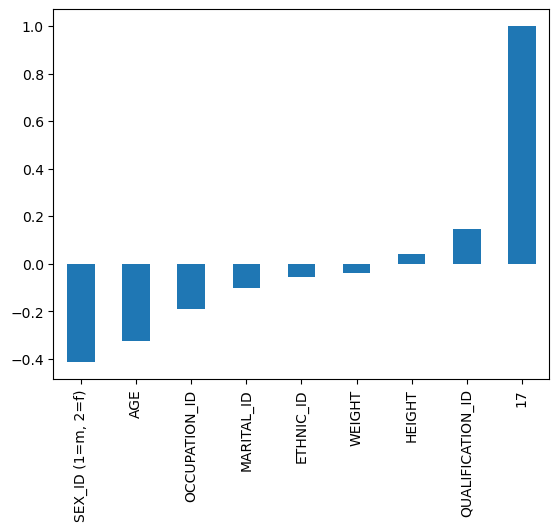

In [63]:
#colculate成對相關性
corr = df_corr.corr()
corr_17 = corr[17]
corr_17.sort_values().plot.bar()